In [3]:
# -*- coding: utf-8 -*-

## Imports des modules

In [56]:
%matplotlib inline

In [55]:
import re
from random import random
import matplotlib.pyplot as plt
import numpy as np

## Outils

In [6]:
def  nettoyer_fichier(fichier):
    """Prend en paramètre :
    - fichier de type str qui est un chemin vers un fichier texte
    Nettoie le texte contenu dans le fichier : 
    - suppression des symboles de ponctuation
    - réduction des espaces multiples
    - conversion en minuscules
    Retourne le texte nettoyé"""
    f = open(fichier, 'r')
    data = f.read()
    #suppression des symboles de ponctuation
    data = re.sub(r'[^\w\s]', ' ', data)
    #réduction des espaces multiples
    data = re.sub(r'\s+',' ', data)
    f.close()  
    #conversion en minuscules
    data = data.lower()
    return data

In [7]:
tab_mots_mousquetaires = nettoyer_fichier('3mousquetaires.txt')
tab_mots_mousquetaires[:3].split(' ')

['', 'in']

In [8]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [9]:
re.split('\s+',' introduction')

['', 'introduction']

## Exercice 2

In [10]:
def extraire_tab_mot(source):
    """Prend en paramètre :
    - source de type str qui est un chemin vers un fichier texte
    Nettoie le texte contenu dans le fichier avec nettoyer_fichier
    Découpe le texte selon le séparateur espace simple
    Retourne le tableau obtenu"""
    return nettoyer_fichier(source).split()

In [11]:
tab_mots_mousquetaires = extraire_tab_mot('3mousquetaires.txt')

In [12]:
len(tab_mots_mousquetaires), tab_mots_mousquetaires[:3]

(239574, ['introduction', 'il', 'y'])

In [13]:
assert (len(tab_mots_mousquetaires), tab_mots_mousquetaires[:3]) == (239574, ['introduction', 'il', 'y'])

In [14]:
def histogramme(tab):
    """Prend en paramètre:
    - un tableau de mots de type str
    Retourne un dictionnaire histo associant
    à chaque mot son nombre d'occurrences dans tab
    """
    histo = {}
    for mot in tab:
        if mot not in histo:
                histo[mot] = 1
        else:
            histo[mot] = histo[mot] + 1
    return histo

In [15]:
histo_mousquetaires = histogramme(tab_mots_mousquetaires)

In [16]:
histo_mousquetaires['cardinal']

551

In [17]:
assert(histo_mousquetaires['milady'] == 710 \
       and histo_mousquetaires['cardinal'] == 551)

In [18]:
def plus_frequent_mot(histo):
    """Prend en paramètre :
    - un dictionnaire histo 
    représentant les nombres d'occurences de mots dans un texte
    Renvoie un tuple constitué du  plus grand nombre d'occurences    
    et du tableau de tous les mots atteignant ce maximum"""
    nboccurence_max = -1
    for (mot, nboccurence) in histo.items():
        if nboccurence > nboccurence_max:
            nboccurence_max = nboccurence
            tab_champion = [mot]
        elif nboccurence == nboccurence_max:
            tab_champion.append(mot)
    return (nboccurence_max, tab_champion)

In [19]:
assert(plus_frequent_mot(histo_mousquetaires) == (8964, ['de']))

In [20]:
def tri_valeur(paire_clef_valeur):
    clef, valeur = paire_clef_valeur
    return valeur

def tri_clef(paire_clef_valeur):
    clef, valeur = paire_clef_valeur
    return clef


def top_unigramme(source, but):
    """Prend en paramètres 
    - source de type str qui est un chemin vers un fichier texte
    - but de type str qui est un chemin vers un fichier texte
    Extrait dans un tableau les mots du texte contenu dans source 
    Construit un dictionnaire représentant un histogramme de ce tableau
    Convertit ce dictionnaire en tableau et le classe par ordre décroissant des occurences
    Renvoie ce tableau classé et recopie son contenu dans le fichier but
    """
    tab_mot_source = extraire_tab_mot(source)
    histo_mot_source = histogramme(tab_mot_source)
    tab_histo_mot_source = list(histo_mot_source.items())
    top_mot_source = sorted(tab_histo_mot_source, key = tri_valeur, reverse = True)
    f = open(but, 'w')
    for mot, nboccurence in top_mot_source:
        f.write(','.join([mot, str(nboccurence)]) + '\n')
    f.close()
    return top_mot_source    

In [21]:
top_mousquetaires = top_unigramme('3mousquetaires.txt', 'top-mousquetaires.csv')
assert(top_mousquetaires[:4] == [('de', 8964), ('et', 5792), ('la', 5357), ('le', 5191)])

In [22]:
top_swann = top_unigramme('ducotedechezswann.txt', 'top-swann.csv')
assert(top_swann[:4] == [('de', 7794), ('la', 3937), ('et', 3898), ('à', 3829)])

## Exercice 3

In [23]:
def exemple_graphique():
    #import de la bibliothèque graphique
    import matplotlib.pyplot as plt
    #graduations de l'axe des abscisses
    plt.xticks(list(range(1, 4)), ['T1', 'T2', 'T3'], rotation = 60)
    #légende de l'axe des abscisses
    plt.xlabel('Trimestres')
    #limites des abscisses
    plt.xlim(0, 4)
    #graduations de l'axe des ordonnées
    plt.yticks([5,10,15,20], ['D', 'C', 'B', 'A'])
    #légende de l'axe des ordonnées
    plt.ylabel('Moyennes')
    #limite des ordonnées
    plt.ylim(0,20)
    #affichage de la grille
    plt.grid()
    #Titre du graphique
    plt.title('Élève X année scolaire 2016/2017')
    #liste d'abscisses
    x = list(range(1, 4))
    #liste d'ordonnées
    y = [6,17,12]
    #graphique avec des points bleus reliés en pointillés
    plt.plot(x, y,'bo:')
    #affichage du graphique
    plt.show()
    #enregistrement sur disque du graphique
    plt.savefig('eleve-X-2016-2017.png')

In [132]:
import os.path

def diagramme_top50_unigramme(source):
    """Prend en paramètre :
    - source de type str qui représente un chemin vers un fichier texte
    Génère le diagramme du top 50 des mots les plus fréquents dans source"""
    base, ext = os.path.splitext(source)
    top_source = top_unigramme(source, '-'.join(['top', base]) +  '.csv')
    #graduations de l'axe des abscisses
    plt.xticks(list(range(1, 51)), [top_source[k][0] for k in range(50)], rotation = 60)
    #légende de l'axe des abscisses
    plt.xlabel('Mots')
    #légende de l'axe des ordonnées
    plt.ylabel('Occurences')
    #Titre du graphique
    plt.title('Top 50 des unigrammes dans {}'.format(source))
    #tableau des  abscisses et des ordonnées
    x, y = [], []
    for k in range(50):
        mot, nboccurence = top_source[k]
        x.append(mot)
        y.append(nboccurence)
    #diagramme en batons bleus
    plt.bar(x, y)
    #affichage du graphique
    plt.show()
    #enregistrement sur disque du graphique
    plt.savefig('-'.join(['top', base, 'png']))

<IPython.core.display.Javascript object>


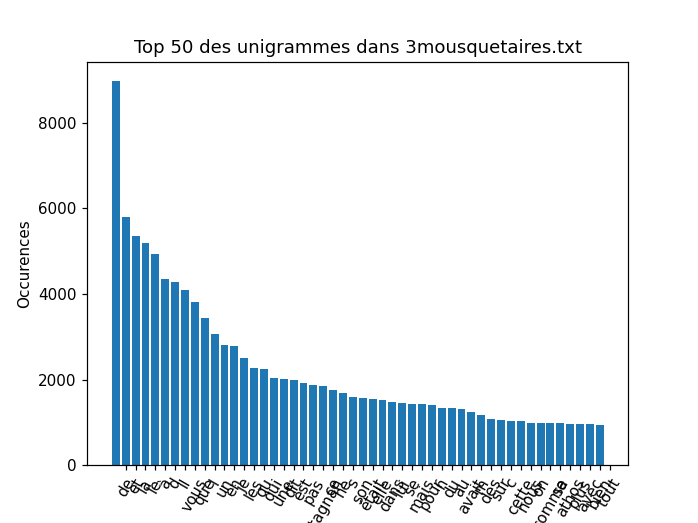

In [133]:
%matplotlib notebook
import matplotlib.pyplot as plt
diagramme_top50_unigramme('3mousquetaires.txt')

<IPython.core.display.Javascript object>


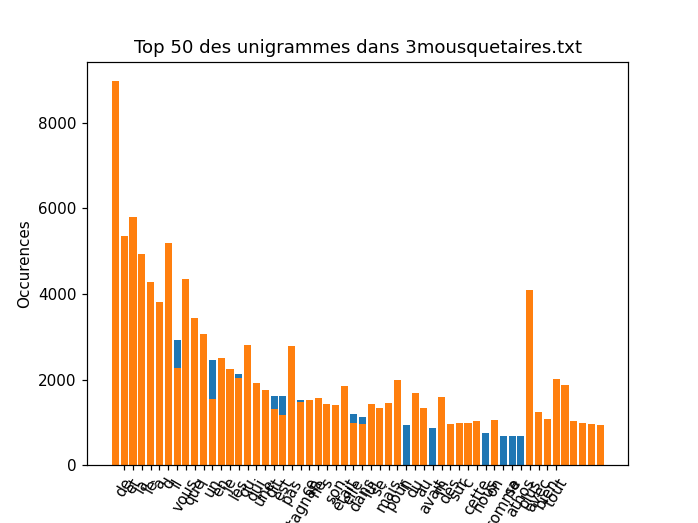

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt
diagramme_top50_unigramme('ducotedechezswann.txt')

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

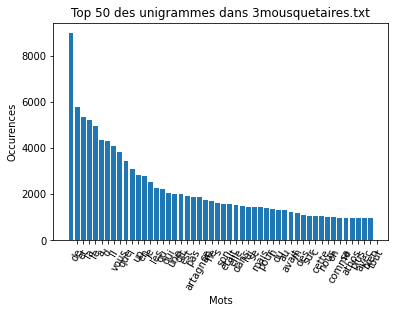

<Figure size 432x288 with 0 Axes>

In [68]:
diagramme_top50_unigramme('3mousquetaires.txt')

## Exercice 4

In [69]:
def prochain_histo(source):
    """Prend en paramètre :
    - source de type str qui représente un chemin vers un fichier texte
    Extrait le tableau de mots contenu dans le texte de source
    Renvoie un dictionnaire de dictionnaires prochain tel que prochain[mot1][mot2]
    représente le nombre d'occurences de mot2 juste après mot1
    """
    tab_mot = extraire_tab_mot(source)
    prochain = dict()
    for k in range(len(tab_mot) - 1):
        mot = tab_mot[k]
        suivant = tab_mot[k + 1]
        if mot not in prochain:
            prochain[mot] = {suivant : 1}
        else:
            if suivant not in prochain[mot]:
                prochain[mot][suivant] = 1
            else:
                prochain[mot][suivant] = prochain[mot][suivant] + 1
    return prochain

In [70]:
prochain_mousquetaires = prochain_histo('3mousquetaires.txt')

In [81]:
assert prochain_mousquetaires['pose'] == {'qui': 2, 'gracieuse': 1, 'et': 1}
assert prochain_mousquetaires['la']['bastille'] == 29
assert prochain_mousquetaires['de']['buckingham'] == 59

In [82]:
def somme_histo(histo):
    """Prend en paramètre :
    - histo qui est un dictionnaire de coules (mot : str, effectif : int)
    Renvoie un entier qui est  la somme des effectifs    
    """
    somme = 0
    for effectif in histo.values():
        somme = somme + effectif
    return somme

In [86]:
assert somme_histo(prochain_mousquetaires['pose']) == 4
assert somme_histo(prochain_mousquetaires['de']) == 8964

In [87]:
def prochain_freq(source):
    """Prend en paramètre :
    - source de type str qui représente un chemin vers un fichier texte
    Renvoie un dictionnaire de dictionnaires fred tel que fred[mot1][mot2]
    représente la fréquence de mot2 parmi les digrammes commençant par mot1
    """
    prochain = prochain_histo(source)
    freq_digramme = dict()
    for mot in prochain:
        freq_digramme[mot] = dict()
        histo = prochain[mot]
        nbsuivant = somme_histo(histo)
        for suivant, effectif in histo.items():
            freq_digramme[mot][suivant] = effectif / nbsuivant
    return freq_digramme

In [93]:
freq_digramme_mousquetaire = prochain_freq('3mousquetaires.txt')
assert freq_digramme_mousquetaire['pose']['gracieuse'] == 0.25
assert freq_digramme_mousquetaire['pose']['et'] == 0.25
assert freq_digramme_mousquetaire['pose']['qui'] == 0.5

## Exercice 5

In [94]:
def histo_cumul(histo):
    """Prend en paramètre :
    - histo un dictionnaire associant à un mot de type str une fréquence de type float
    Retourne un tableau de paires (mot, fréquence cumulée)
    """
    tab = []
    n = len(tab)
    for (mot, freq) in histo.items():
        if n > 0:
            tab.append((mot, tab[n - 1][1] + freq))
        else:
            tab.append((mot, freq))
        n = n + 1
    return tab    

In [98]:
freq_digramme_mousquetaire['pose']

{'qui': 0.5, 'gracieuse': 0.25, 'et': 0.25}

In [97]:
histo_cumul(freq_digramme_mousquetaire['pose'])

[('qui', 0.5), ('gracieuse', 0.75), ('et', 1.0)]

In [111]:
def mot_suivant(freq_second):
    """Prend en paramètre :
    - freq_second un dictionnaire de paires (m : int, f : float)
    représentant la distribution de fréquences de seconds mots 
    parmi les digrammes commençant par un certain mot
    """
    alea = random()
    freq_second_cumul = histo_cumul(freq_second)
    k = 0
    while freq_second_cumul[k][1] < alea:
        k = k + 1
    return freq_second_cumul[k][0]

In [117]:
mot_suivant(freq_digramme_mousquetaire['pose'])

'et'

In [118]:
mot_suivant(freq_digramme_mousquetaire['pose'])

'gracieuse'

In [119]:
def frequence_echantillon_mot_suivant(taille, premier_mot, freq):
    """Prend en paramètre :
    - taille de type int représentant la taille de l'échantillon
    - premier_mot de type str
    - freq un dictionnaire de dictionnaires 
    tel que freq[premier_mot] est la distribution de fréquences
    des seconds mots dans les digrammes commençant par premier_mot    
    Renvoie un dictionnaire représentant la distribution de fréquences
    des seconds mots parmi les digrammes commençant par premier_mot
    sur un échantillon de taille passée en paramètre
    """
    histo = {}
    freq_second = freq[premier_mot]
    for k in range(taille):
        suivant = mot_suivant(freq_second)
        if suivant not in histo:
            histo[suivant] = 1
        else:
            histo[suivant] = histo[suivant] + 1
    return {clef : val / taille for (clef, val) in histo.items()}

In [121]:
frequence_echantillon_mot_suivant(1000, 'pose', freq_digramme_mousquetaire)

{'gracieuse': 0.246, 'qui': 0.519, 'et': 0.235}

In [123]:
frequence_echantillon_mot_suivant(100000, 'pose', freq_digramme_mousquetaire)

{'qui': 0.50156, 'gracieuse': 0.25048, 'et': 0.24796}

In [148]:
import os.path 

def auto_texte(source, debut, taille):
    """Prend en paramètre :
    - source de type str un chemin vers un fichier texte
    - debut de type str un premier mot
    - taille de type int
    Ecrit dans un fichier texte, un texte généré aléatoirement
    à partir des distributions de fréquences des seconds mots
    pour les digrammes du texte de source"""
    freq = prochain_freq(source)
    base, ext = os.path.splitext(source)
    #nom du fichier de sortie
    sortie = '-'.join([base, 'auto', str(taille)]) + ext
    #ouverture du fichier de sortie
    f = open(sortie, 'w')
    mot = debut
    f.write(mot + ' ')
    taille_ligne = len(mot) + 1
    for k in range(taille - 1):
        mot = mot_suivant(freq[mot])
        if len(mot) + 1 + taille_ligne > 60:
            f.write('\n')
            f.write(mot + ' ')
            taille_ligne = len(mot) + 1
        else:
            f.write(mot + ' ')
            taille_ligne = taille_ligne + len(mot) + 1      
    f.close()

In [150]:
auto_texte('3mousquetaires.txt', 'le', 60)